## k-최근접 이웃 회귀 

* 예측하고자 하는 데이터의 근처 데이터를 참조하고, 해당 데이터들의 평균을 구해서 예측하고자 하는 값을 출력한다. 

In [2]:
import numpy as np

perch_length = np.array(
    [
        8.4,
        13.7,
        15.0,
        16.2,
        17.4,
        18.0,
        18.7,
        19.0,
        19.6,
        20.0,
        21.0,
        21.0,
        21.0,
        21.3,
        22.0,
        22.0,
        22.0,
        22.0,
        22.0,
        22.5,
        22.5,
        22.7,
        23.0,
        23.5,
        24.0,
        24.0,
        24.6,
        25.0,
        25.6,
        26.5,
        27.3,
        27.5,
        27.5,
        27.5,
        28.0,
        28.7,
        30.0,
        32.8,
        34.5,
        35.0,
        36.5,
        36.0,
        37.0,
        37.0,
        39.0,
        39.0,
        39.0,
        40.0,
        40.0,
        40.0,
        40.0,
        42.0,
        43.0,
        43.0,
        43.5,
        44.0,
    ]
)
perch_weight = np.array(
    [
        5.9,
        32.0,
        40.0,
        51.5,
        70.0,
        100.0,
        78.0,
        80.0,
        85.0,
        85.0,
        110.0,
        115.0,
        125.0,
        130.0,
        120.0,
        120.0,
        130.0,
        135.0,
        110.0,
        130.0,
        150.0,
        145.0,
        150.0,
        170.0,
        225.0,
        145.0,
        188.0,
        180.0,
        197.0,
        218.0,
        300.0,
        260.0,
        265.0,
        250.0,
        250.0,
        300.0,
        320.0,
        514.0,
        556.0,
        840.0,
        685.0,
        700.0,
        700.0,
        690.0,
        900.0,
        650.0,
        820.0,
        850.0,
        900.0,
        1015.0,
        820.0,
        1100.0,
        1000.0,
        1100.0,
        1000.0,
        1000.0,
    ]
)

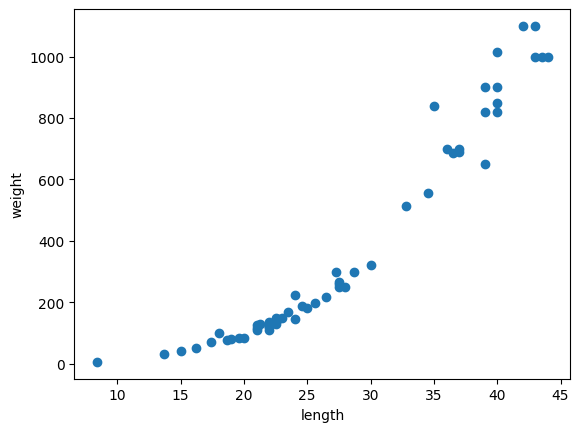

In [6]:
import matplotlib.pyplot as plt

plt.scatter(perch_length,perch_weight)
plt.xlabel("length")
plt.ylabel("weight")
plt.show()

산점도를 확인해보니, 농어의 길이가 커짐에 따라 무게도 늘어난다. 
농어 데이터를 머신러닝 모델에 사용하기 전에 훈련 세트와 테스트 세트로 나누어보자.

In [10]:
from sklearn.model_selection import train_test_split

train_input, test_input ,train_target , test_target = train_test_split(
    perch_length, perch_weight, random_state=42
)
print(train_input.shape)

(42,)


사이킷런에 사용할 훈련 세트는 2차원 배열이어야 한다. 
perch_length는 1차원 배열이기 때문에, 2차원 배열로 만들어주어야한다. 

[1,2,3]  ( 3, )-> [[1],[2],[3]] ( 3, 1)



In [19]:
test = np.arange(8)

print(test.reshape(-1, 4)) # -1은 자동으로 나머지 원소 개수로 채운다. 

# 즉, 위의 예시로는 열을 4로 만들고, 4열에 맞도록 행의 개수를 자동으로 채우라는 의미

print(test.reshape(4,-1)) 

[[0 1 2 3]
 [4 5 6 7]]
[[0 1]
 [2 3]
 [4 5]
 [6 7]]


In [21]:
train_input = train_input.reshape(-1,1) # 특성이 하나이므로, 열을 1로 설정 

test_input = test_input.reshape(-1,1)
print(train_input.shape , test_input.shape) # 2차원 배열로 바뀐 것을 확인할 수 있다.



(42, 1) (14, 1)


In [ ]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor()

# k 최근접 이웃 회귀 모델을 훈련한다. 

knr.fit(train_input, train_target)
print(knr.score(test_input,test_target)) # 테스트 데이터에 대한 정확도확도

0.992809406101064


In [26]:
from sklearn.metrics import mean_absolute_error

# 테스트 세트에 대한 예측을 만든다.

test_predictions = knr.predict(test_input)

# 테스트 세트에 대한 평균 절댓값 오차를 계산한다.

mae = mean_absolute_error(test_target, test_predictions)

print(mae)
# 19.157142857142862가 출력되므로, 평균보다 19g 오차가 있다. 

19.157142857142862


In [30]:
print(knr.score(train_input, train_target))

# 앞서, 테스트 데이터에 대한 점수를 보았을 때, 0.992809406101064인데반해
# 훈련 데이터의 정확도는 0.9698823289099254 이다. 

# 원래라면, 훈련 데이터에 대해서 훈련을 했기 때문에, 훈련데이터로 스코어를 산출하면,
# 훈련 데이터의 정확도가 높아야 하지만, 지금은 반대상황이다. 왜 그럴까 ?

0.9698823289099254


## 과대 적합

- 모델이 훈련 데이터에 대해서는 잘 예측하지만, 새로운 데이터에 대해서 잘 예측하지 못하는 것
- 즉, 모델이 훈련 데이터에 너무 편향되어 훈련이 되었다.

## 과소 적합

- 모델이 훈련 데이터에 대해 잘 예측하지 못하고, 테스트 데이터에 대해 훈련 데이터보다 더 높은 예측을 하거나, 훈련 데이터의 예측 스코어가 낮은 경우
- 모델이 훈련 데이터에 대해서 잘 훈련을 하지 못했다. 일반적으로 데이터가 부족하여 발생함.

즉, 현재는 훈련 데이터의 정확도보다, 테스트 데이터의 정확도가 높게 나왔으므로, 과소 적합이 발생했다. 그럼 어떻게 과소 적합과 과대 적합되지 않은 적절한 모델을 만들 수 있을까 ?

k값을 작게하면, 국지적인 데이터를 보고, 판단을 하기 때문에, 더욱 특성을 잘 고려할 수 있다. 

< 예시 >

상황 설정
평면 상에 두 개의 명확한 클러스터(군집)가 있다고 가정해봅시다.

클러스터 A: 왼쪽에 몰려 있는 데이터
클러스터 B: 오른쪽에 몰려 있는 데이터
k가 클 때의 경우
예측 시나리오:
예측하려는 점이 두 클러스터의 경계 근처에 있다고 합시다.

<u><b>만약 k=20이라면,</b></u> 이 예측은 양쪽 클러스터에서 20개의 데이터를 모두 고려하게 됩니다.
결과적으로, 두 클러스터의 평균적인 특성이 혼합되어, 경계가 뚜렷하지 않은 부드러운 결정 경계가 만들어집니다.
이는 모델이 “데이터 전체의 평균”에 가까운 예측을 내게 하여, 국소적인 차이를 반영하지 못하므로 과소적합이 발생할 수 있습니다.
k가 작을 때의 경우
예측 시나리오:
같은 위치에서 <u><b>k=3으로 설정하면,</b></u> 가장 가까운 3개의 데이터만 고려하게 됩니다.
만약 이 3개의 데이터가 클러스터 A에 속한다면, 예측은 클러스터 A의 특성을 더 반영하게 되어, 경계가 보다 명확하게 드러납니다.
국소적인 정보를 반영하기 때문에 데이터의 복잡한 패턴을 더 잘 학습할 수 있습니다.

In [33]:
### k가 기본 5로 설정되어 있던 것을 3으로 해보자.

knr = KNeighborsRegressor(n_neighbors=3)
knr.fit(train_input,train_target)
knr.score(train_input, train_target)  # 0.9804899950518966로 정확도가 올랐다. 
# 과소적합 방지 

0.9804899950518966

In [ ]:
print(knr.score(test_input,test_target))
# train_input과의 점수 차이가 크지 않을 것을 보아, 
# 현재 모델은 과대적합도, 과소적합도 되지 않은것으로 알 수 있다. 
# 일반적으로, 훈련 데이터의 스코어가 높게 나온다. 

0.9746459963987609
